In [50]:
using Plots

include("../src/power_spectrum.jl")
include("../src/TreeLevelBispectrum.jl")
include("../src/bispectrum_multipoles.jl")

B00 (generic function with 1 method)

In [28]:
mugrid = range(0, 1, length=101)
phigrid = range(0, 2*π, length=101)

0.0:0.06283185307179587:6.283185307179586

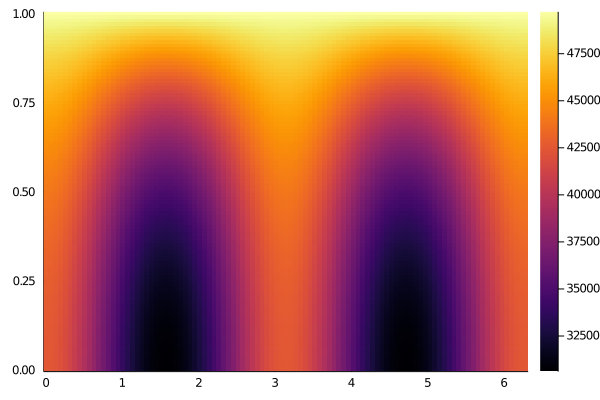

In [58]:
k1 = 0.1; k2 = 0.08; k3 = 0.08; b1 = 2; b2 = 0.3; f = 0.5;
pk = init_linear_pk("../data/test_pk.txt")
Bkkk = [tree_level_bk(x, y, k1, k2, k3, b1, b2, f, pk) for x in mugrid, y in phigrid]
pks = init_linear_pk("../data/test_smooth_pk.txt")
Bkkk = [tree_level_bk(x, y, k1, k2, k3, b1, b2, f, pks) for x in mugrid, y in phigrid]
heatmap(phigrid, mugrid, Bkkk)

In [30]:
k1 = 0.1; k2 = 0.08; k3 = 0.08; b1 = 2; b2 = 0.3; f = 0.5;
Bkkk00 = B00(k1, k2, k3, b1, b2, f, pk)

0.0

In [31]:
B5D = x -> tree_level_bk(x[1], x[2], k1, k2, k3, b1, b2, f, pk)
hcubature(B5D, [0, 0], [1, 2*pi])

(2.7643709191290314e10, 268.4900095462799)

In [60]:
kkk = kkk_grid(0.005, 0.010, 30)
Nkkk = size(kkk)[2]
Bkkk00 = zeros(Nkkk)
Bkks00 = zeros(Nkkk)
Bkkkm0 = zeros(Nkkk)
Bkksm0 = zeros(Nkkk)
for i in 1:Nkkk
    Bkkk00[i] = B00(kkk[1,i], kkk[2,i], kkk[3,i], b1, b2, f, pk)
    Bkkkm0[i] = tree_level_bk(0, 0, kkk[1,i], kkk[2,i], kkk[3,i], b1, b2, f, pk)
    Bkks00[i] = B00(kkk[1,i], kkk[2,i], kkk[3,i], b1, b2, f, pks)
    Bkksm0[i] = tree_level_bk(0, 0, kkk[1,i], kkk[2,i], kkk[3,i], b1, b2, f, pks)
end

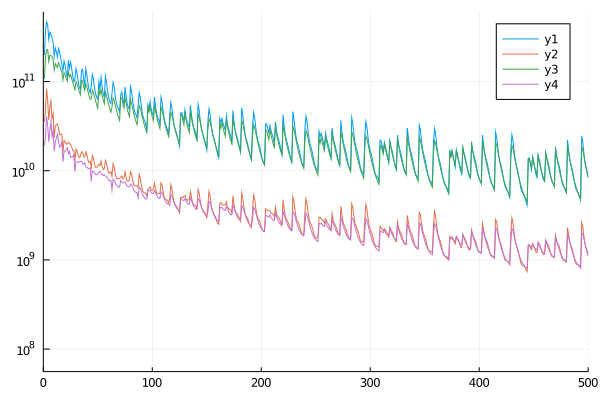

In [62]:
plot(Bkkk00, yaxis=:log, xlim=(0,500))
plot!(Bkkkm0)
plot!(Bkks00, yaxis=:log, xlim=(0,500))
plot!(Bkksm0)

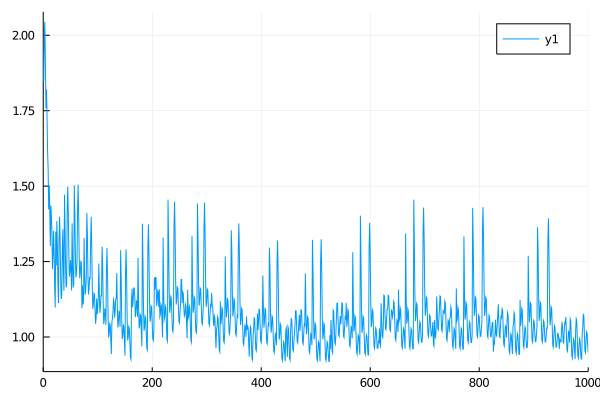

In [65]:
plot(Bkkk00./Bkks00, xlim=(0, 1000))